In [1]:
from matplotlib import pyplot as plt
import pandas as pd
plt.rcParams['figure.facecolor'] = 'white'

In [2]:
df0=pd.read_pickle("./df_run_CTRL_.pkl")

runs=['03','04','05','06','07','08','09','10','11']
fnames=['df_run_land_t' + r + '_.pkl' for r in runs]
dfs=[pd.read_pickle(f) for f in fnames]


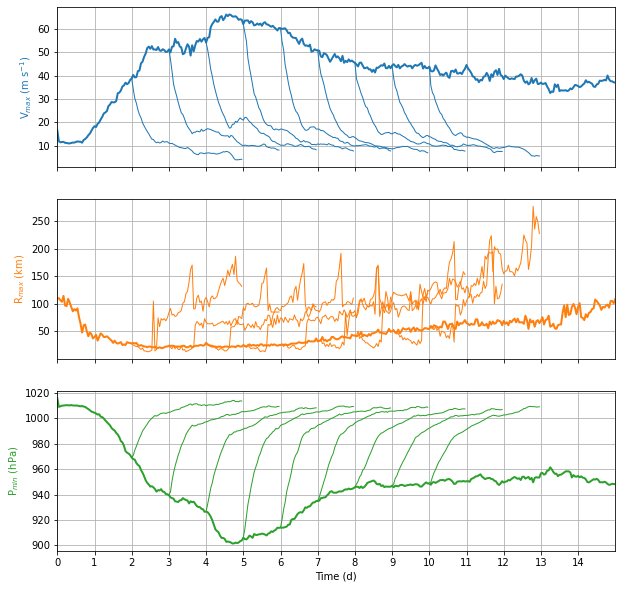

In [6]:
fig,axs=plt.subplots(3, 1, sharex='col')

linw=2

axs[0].plot(df0.index,df0.V10max,color='C0',lw=linw,linestyle='-')
axs[1].plot(df0.index,df0.rV10max,color='C1',lw=linw,linestyle='-')
axs[2].plot(df0.index,df0.pmin,color='C2',lw=linw,linestyle='-')

axs[0].set_ylabel('V$_{max}$ (m s$^{-1}$)',color='C0')
axs[1].set_ylabel('R$_{max}$ (km)',color='C1')
axs[2].set_ylabel('P$_{min}$ (hPa)',color='C2')

linw=1
for n,df in enumerate(dfs):
    axs[0].plot(df.index,df.V10max,color='C0',lw=linw,linestyle='-')
    axs[1].plot(df.index,df.rV10max,color='C1',lw=linw,linestyle='-')
    axs[2].plot(df.index,df.pmin,color='C2',lw=linw,linestyle='-')

# axs[0].set_xlabel('Time (d)')
# axs[0].set_position
xmax=15
axs[0].set_xlim(0,xmax)
plt.xticks(range(0,xmax))
axs[0].grid(True)

# axs[1].set_xlabel('Time (d)')
# axs[1].set_position
axs[1].grid(True)

axs[2].set_xlabel('Time (d)')
axs[2].set_position
axs[2].grid(True)


fig.set_size_inches(10,10)
fig.savefig('vmax_ts_.png',dpi=300,bbox_inches='tight', pad_inches=0.1,transparent=False)
plt.show()